In [319]:
import pandas as pd
import numpy as np
import plotly as plt



In [320]:
df = pd.read_excel('Rel_2_Nutrient_file.xlsx', sheet_name="All solids & liquids per 100g")

In [321]:
print(df)

print(df.info())



     Public Food Key  Classification  \
0            F002258         31302.0   
1            F002893         31302.0   
2            F002963         31302.0   
3            F002970         31302.0   
4            F003190         31302.0   
...              ...             ...   
1611         F009774         24702.0   
1612         F009773         24702.0   
1613         F009766         24702.0   
1614         F009765         24702.0   
1615         F009764         24702.0   

                                              Food Name  \
0                          Cardamom seed, dried, ground   
1                         Chilli (chili), dried, ground   
2                               Cinnamon, dried, ground   
3                                 Cloves, dried, ground   
4                         Coriander seed, dried, ground   
...                                                 ...   
1611  Zucchini, green skin, fresh, unpeeled, fried, ...   
1612  Zucchini, green skin, fresh, unpeeled, bo

In [322]:
threshold = 0.1
cols_to_drop = df.columns[(df.count() / len(df)) < threshold]
df = df.drop(cols_to_drop, axis =1)

df = df[df.columns[df.isnull().mean() < 0.1]]

In [323]:
print(df)

     Public Food Key  Classification  \
0            F002258         31302.0   
1            F002893         31302.0   
2            F002963         31302.0   
3            F002970         31302.0   
4            F003190         31302.0   
...              ...             ...   
1611         F009774         24702.0   
1612         F009773         24702.0   
1613         F009766         24702.0   
1614         F009765         24702.0   
1615         F009764         24702.0   

                                              Food Name  \
0                          Cardamom seed, dried, ground   
1                         Chilli (chili), dried, ground   
2                               Cinnamon, dried, ground   
3                                 Cloves, dried, ground   
4                         Coriander seed, dried, ground   
...                                                 ...   
1611  Zucchini, green skin, fresh, unpeeled, fried, ...   
1612  Zucchini, green skin, fresh, unpeeled, bo

In [324]:
#delete rows with NaN
rows_with_nan = df.isnull().any(axis=1).sum()
print(rows_with_nan)
df.dropna(inplace=True)
print(df)

2
     Public Food Key  Classification  \
0            F002258         31302.0   
1            F002893         31302.0   
2            F002963         31302.0   
3            F002970         31302.0   
4            F003190         31302.0   
...              ...             ...   
1611         F009774         24702.0   
1612         F009773         24702.0   
1613         F009766         24702.0   
1614         F009765         24702.0   
1615         F009764         24702.0   

                                              Food Name  \
0                          Cardamom seed, dried, ground   
1                         Chilli (chili), dried, ground   
2                               Cinnamon, dried, ground   
3                                 Cloves, dried, ground   
4                         Coriander seed, dried, ground   
...                                                 ...   
1611  Zucchini, green skin, fresh, unpeeled, fried, ...   
1612  Zucchini, green skin, fresh, unpeeled, 

In [325]:
corr_matrix = df.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
       .stack()
       .sort_values(ascending=False))

count = 0
to_remove = []
for index, value in sol.items():
    if value > 0.80:
        print(index, value)
        if index[1] not in to_remove:
            to_remove.append(index[1])
        count += 1


print(len(to_remove))
df = df.drop(to_remove, axis=1)


('Niacin derived from tryptophan \n(mg)', 'Tryptophan \n(mg)') 0.9999958851643429
('Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)') 0.9993149003190801
('Protein \n(g)', 'Nitrogen \n(g)') 0.9983911858837546
('Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)') 0.9976360646887303
('Beta-carotene \n(ug)', 'Beta-carotene equivalents (provitamin A) \n(ug)') 0.9903886026149695
('Added sugars (g)', 'Free sugars \n(g)') 0.9830018371669701
('Retinol (preformed vitamin A) \n(ug)', 'Vitamin A retinol equivalents \n(ug)') 0.9770439370953488
('C22:6w3 (mg)', 'Total long chain omega 3 fatty acids, equated \n(mg)') 0.9727326148478893
('Total folates \n(ug)', 'Dietary folate equivalents \n(ug)') 0.9691235392777421
('C20:5w3 (mg)', 'Total long chain omega 3 fatty acids, equated \n(mg)') 0.9536344632239753
('Niacin (B3) \n(mg)', 'Niacin derived equivalents \n(mg)') 0.9519205711605714
('C18:2w6 (g)', 'Tot

/var/folders/kd/13kj4jpn7014k9h7jf91w6rc0000gn/T/ipykernel_1395/3323432293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [326]:

constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(constant_cols)
df = df.drop(constant_cols, axis=1)
print(df)


['25-hydroxy ergocalciferol (25-OH D2) \n(ug)']
     Public Food Key  Classification  \
0            F002258         31302.0   
1            F002893         31302.0   
2            F002963         31302.0   
3            F002970         31302.0   
4            F003190         31302.0   
...              ...             ...   
1611         F009774         24702.0   
1612         F009773         24702.0   
1613         F009766         24702.0   
1614         F009765         24702.0   
1615         F009764         24702.0   

                                              Food Name  \
0                          Cardamom seed, dried, ground   
1                         Chilli (chili), dried, ground   
2                               Cinnamon, dried, ground   
3                                 Cloves, dried, ground   
4                         Coriander seed, dried, ground   
...                                                 ...   
1611  Zucchini, green skin, fresh, unpeeled, fried, ...   

In [327]:
unique_identifiers = ['Public Food Key', 'Food Name', 'Classification'];
df = df.drop(columns=unique_identifiers);
print(df)

      Energy with dietary fibre, equated \n(kJ)  Protein \n(g)  Ash \n(g)  \
0                                          1236           10.8        5.8   
1                                          1280           13.4       11.8   
2                                          1004            4.0        3.6   
3                                          1389            6.0        5.6   
4                                          1344           12.4        6.0   
...                                         ...            ...        ...   
1611                                         92            1.3        0.6   
1612                                         77            1.1        0.5   
1613                                         78            2.2        0.6   
1614                                        111            3.1        0.8   
1615                                         93            2.6        0.7   

      Total dietary fibre \n(g)  Alcohol \n(g)  Total sugars (g)  \
0      

In [328]:
df.to_csv('processed.csv', header=True, index=False)

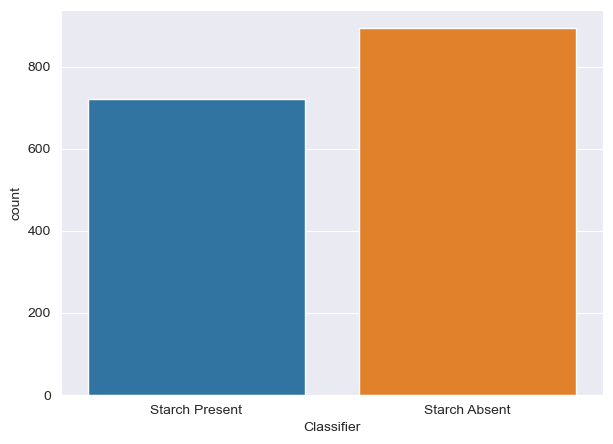

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns


df.loc[df['Starch \n(g)'] > 0, 'Classifier'] = 'Starch Present'
df.loc[df['Starch \n(g)'] == 0, 'Classifier'] = 'Starch Absent'

plt.figure(figsize=(7,5))
sns.countplot(x="Classifier", data=df)
plt.show()


df = df.drop("Starch \n(g)", axis=1)


In [330]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x = df.drop(['Classifier'],axis=1)
y = df['Classifier']

Highest Accuracy for test: 0.931958762886598 at K = 1
Highest Accuracy for train: 1.0 at K = 1


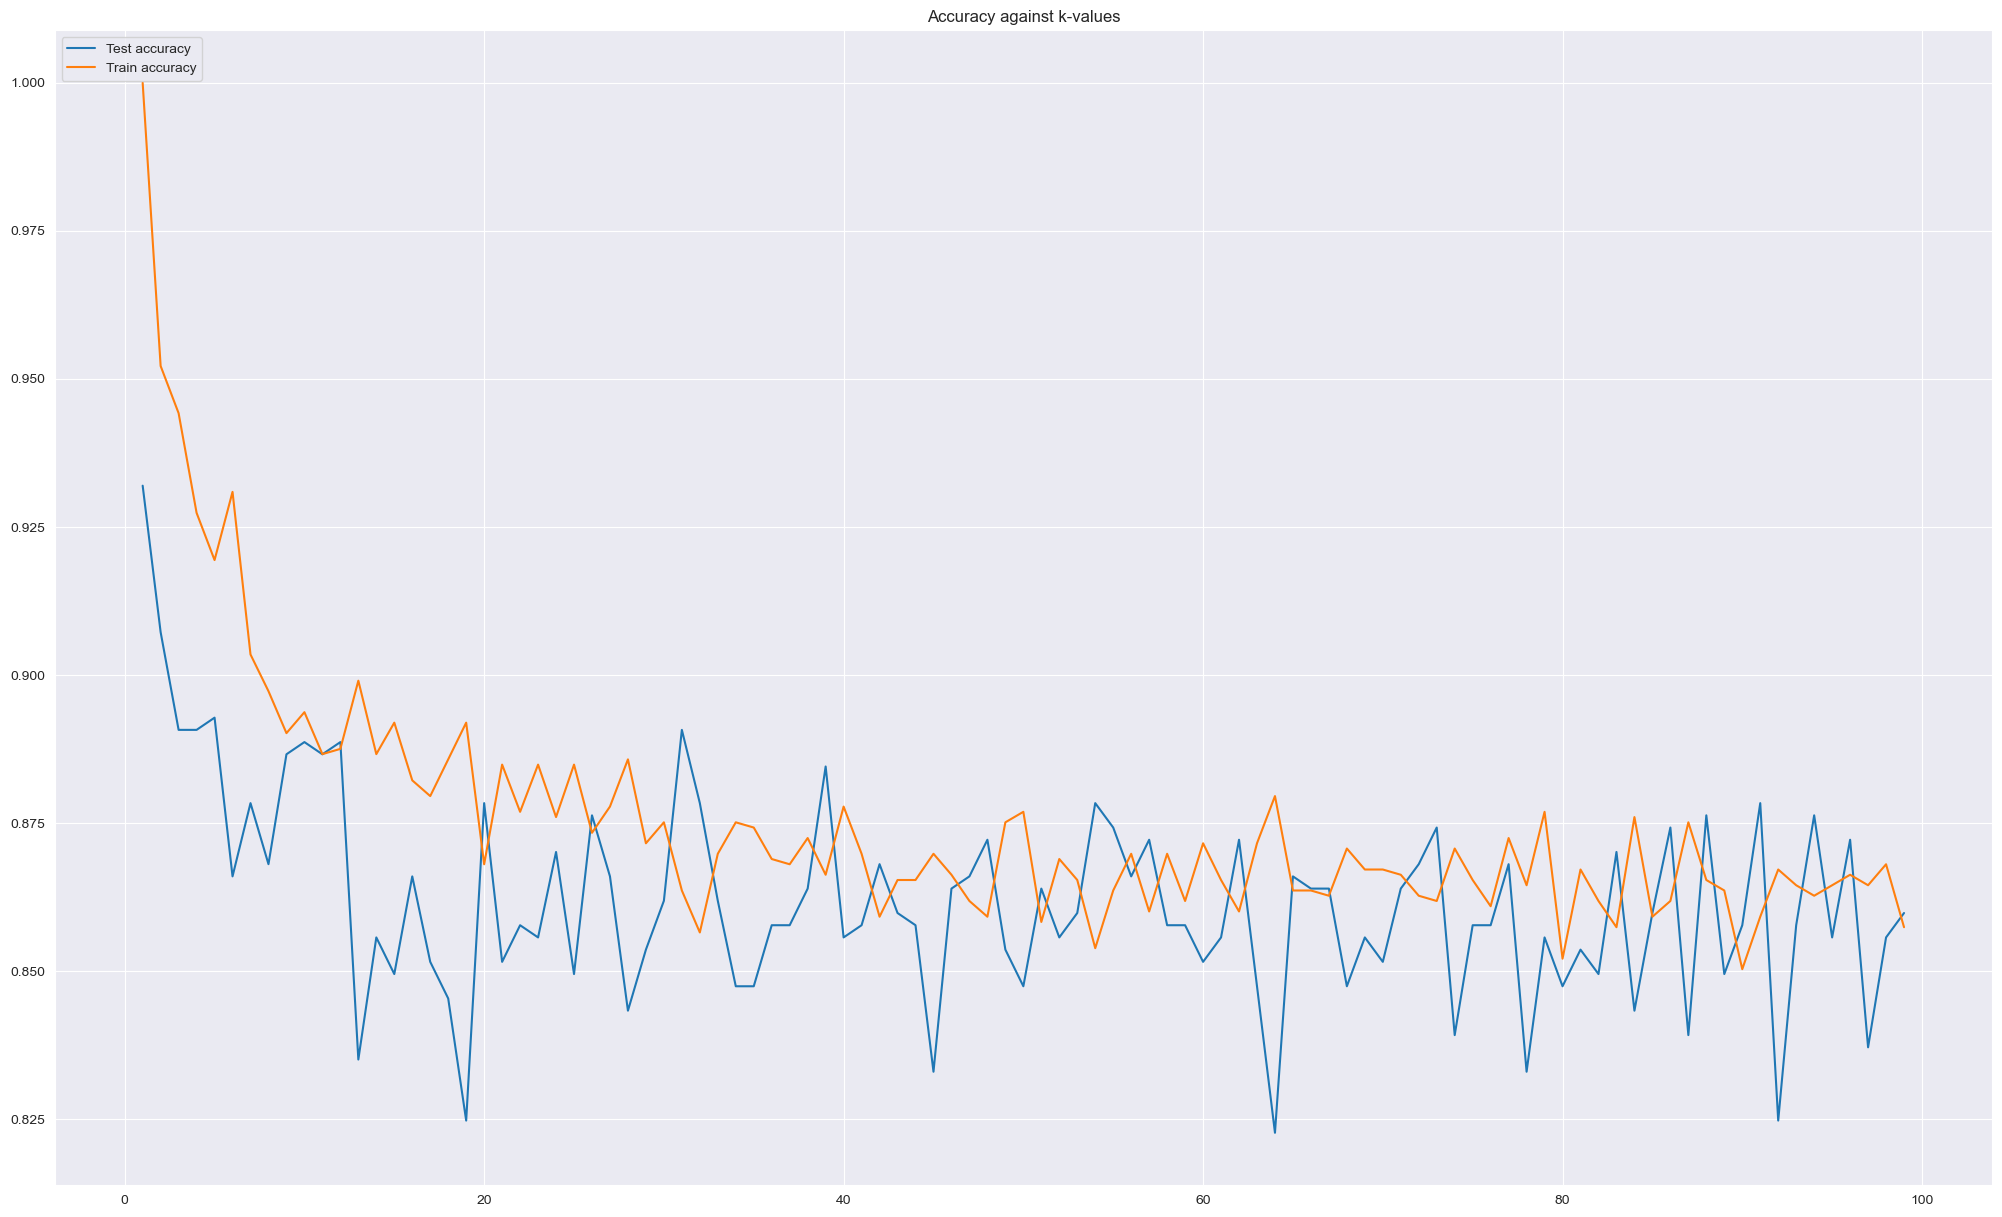

In [331]:
MinMaxScaler = preprocessing.MinMaxScaler()
X = MinMaxScaler.fit_transform(x)
k_val = []
miss_score_test = []
miss_score_train = []
mse_train = []
mse_test = []
acc_test = []
acc_train = []
upper = 100
test_size = 0.3

for k in range(1,upper):
    k_val.append(k)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # pred on test
    test_preds = knn.predict(x_test)
    missclass_rate = 1 - accuracy_score(y_test, test_preds)
    acc_test.append(accuracy_score(y_test, test_preds))
    miss_score_test.append(missclass_rate)

    # pred on train
    train_preds = knn.predict(x_train)
    missclass_rate = 1 - accuracy_score(y_train, train_preds)
    acc_train.append(accuracy_score(y_train, train_preds))
    miss_score_train.append(missclass_rate)

# plot
fig, axs = plt.subplots(1, figsize=(25, 15))

axs.title.set_text('Accuracy against k-values')
axs.plot(k_val, acc_test, label='Test accuracy')
axs.plot(k_val, acc_train, label='Train accuracy')
axs.legend(loc='upper left')

list2 = []
for i in np.where(acc_test == max(acc_test))[0]:
    list2.append(i+1)
print("Highest Accuracy for test:", max(acc_test), "at K =", list2[0])

list3 = []
for i in np.where(acc_train == max(acc_train))[0]:
    list3.append(i+1)
print("Highest Accuracy for train:", max(acc_train), "at K =", list3[0])


In [332]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors' : [x for x in range(1,100)],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'weights' : ['distance', 'uniform'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']}

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs= -1)

g_res = gs.fit(x_train, y_train)
print("Best Score: ",  g_res.best_score_)
print("Parameters: ", g_res.best_params_)





Fitting 10 folds for each of 2376 candidates, totalling 23760 fits
Best Score:  0.9114175094816688
Parameters:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [333]:
from sklearn.model_selection import cross_val_score


# Perform 10-fold cross-validation
scores = cross_val_score(knn, X, y, cv=10)

print('Cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())

Cross-validation scores: [0.79012346 0.7037037  0.75308642 0.98765432 0.8757764  0.68944099
 0.82608696 0.93167702 0.66459627 0.60248447]
Average cross-validation score: 0.782463001303581


In [334]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8948453608247423


In [335]:
n_runs = 10
scores = []

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

average_score = np.mean(scores)

print(f"Average accuracy score over {n_runs} runs: {average_score}")

Average accuracy score over 10 runs: 0.9105263157894736


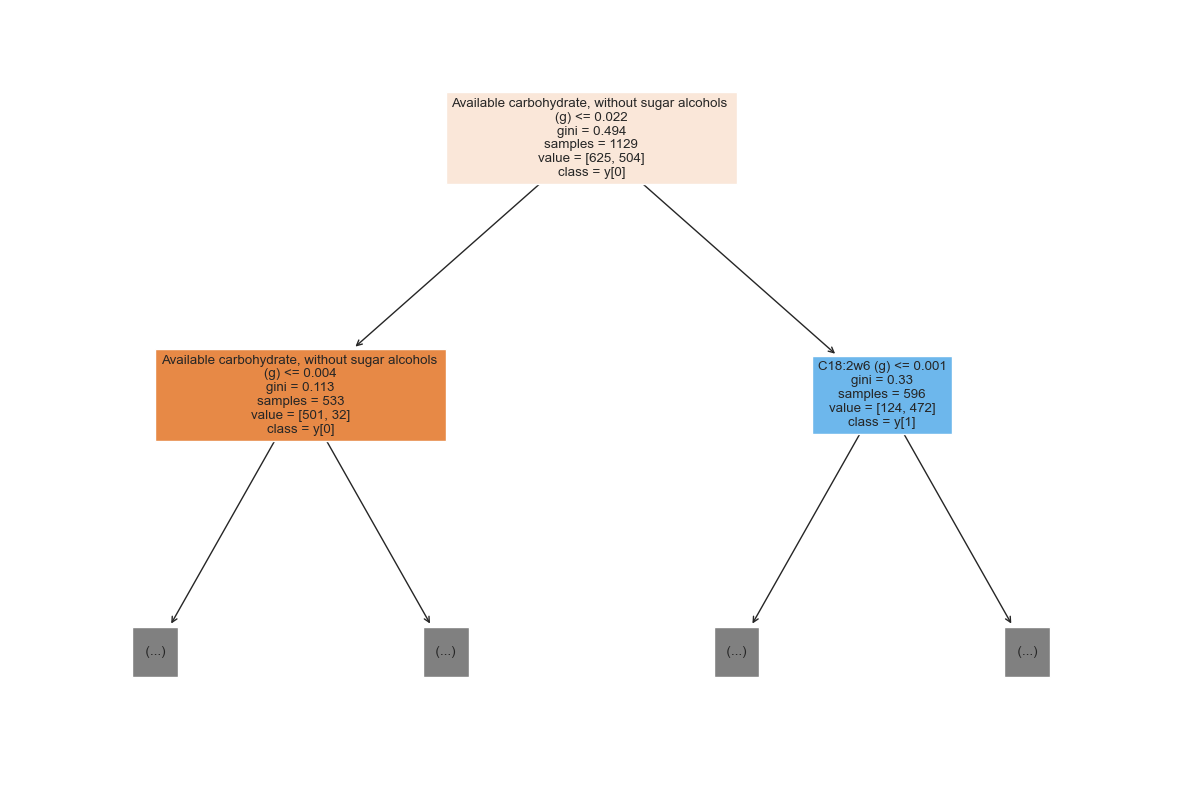

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


## Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust size as needed
tree.plot_tree(clf, max_depth=1, feature_names=x.columns, class_names=True, filled=True, ax=ax)
plt.show()

In [337]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
              'min_samples_split': np.arange(2, 15),
              'min_samples_leaf': np.arange(1, 15),
              'criterion': ['gini', 'entropy']}

# create the grid search object
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

# fit the grid search object to the data
grid.fit(X_train, y_train)

# print the best parameters found by the grid search
print(grid.best_params_)


In [338]:
#print(grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

0.9340557275541796


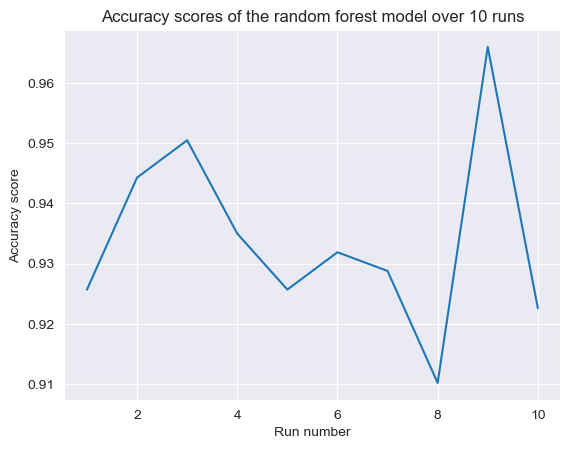

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

# Run the random forest classifier 10 times
for i in range(10):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create an instance of the RandomForestClassifier class
    rf = RandomForestClassifier(random_state=42)

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Use the model to make predictions on the test data
    y_pred = rf.predict(X_test)

    # Calculate the accuracy of the model and add it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores

print(sum(accuracy_scores)/len(accuracy_scores))

plt.plot(range(1, 11), accuracy_scores)
plt.title('Accuracy scores of the random forest model over 10 runs')
plt.xlabel('Run number')
plt.ylabel('Accuracy score')
plt.show()

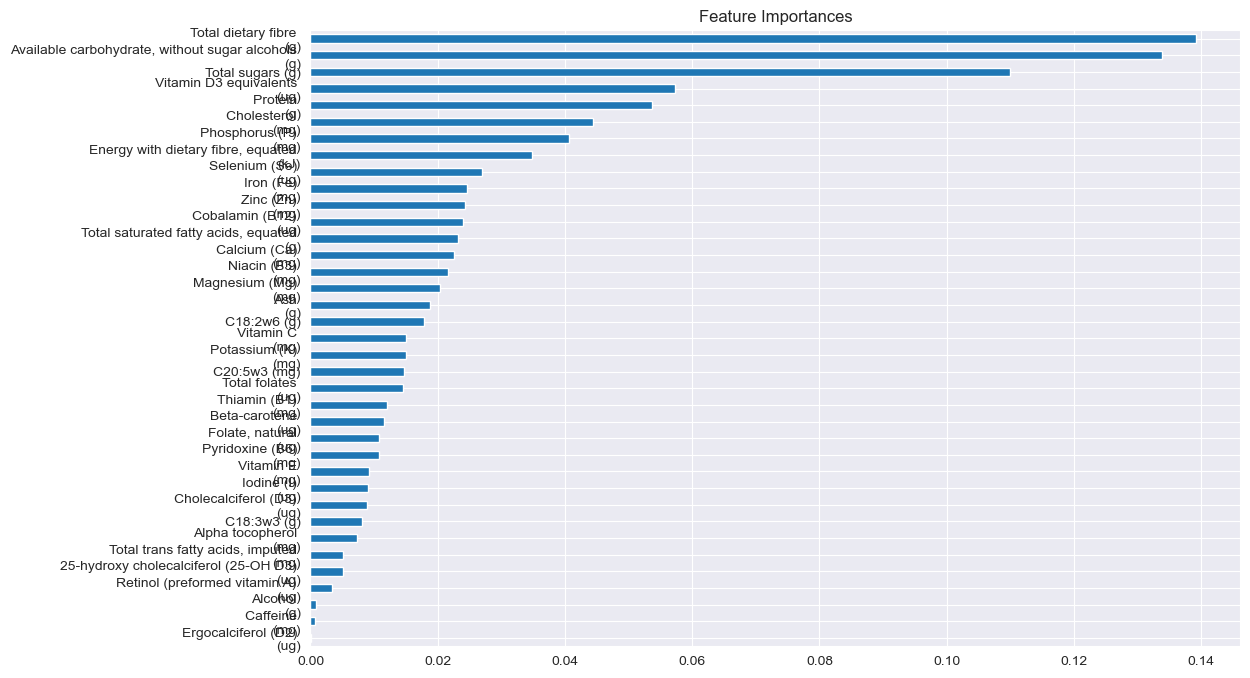

In [340]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

importances = rf.feature_importances_


importances_series = pd.Series(importances, index=x.columns)

# Plot the feature importances
importances_series.sort_values().plot(kind='barh', figsize=(12,8))
plt.title('Feature Importances')
plt.show()

In [341]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a pandas DataFrame aligning feature names with their importance
feature_importances = pd.DataFrame({"Feature": df.columns[:-1], "Importance": importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values("Importance", ascending=True)

# Get the names of the 10 least important features
least_important_features = feature_importances.head(10)['Feature'].values
print(least_important_features)

# Drop the least important features from the original DataFrame
#df_dropped = x.drop(columns=least_important_features)


['Ergocalciferol (D2) \n(ug)' 'Caffeine \n(mg)' 'Alcohol \n(g)'
 '25-hydroxy cholecalciferol (25-OH D3) \n(ug)'
 'Retinol (preformed vitamin A) \n(ug)'
 'Total trans fatty acids, imputed \n(mg)' 'Alpha tocopherol \n(mg)'
 'C18:3w3 (g)' 'Iodine (I) \n(ug)' 'Vitamin E \n(mg)']


In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_

# Use the best model from grid search to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters found by grid search:", best_params)
print("Accuracy of the best model:", accuracy)

Best parameters found by grid search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of the best model: 0.9360824742268041
Best parameters found by grid search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of the best model: 0.9381443298969072


In [344]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.3)
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_

# Use the best model from grid search to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters found by grid search:", best_params)
print("Accuracy of the best model:", accuracy)

Best parameters found by grid search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of the best model: 0.9443298969072165
